<a href="https://colab.research.google.com/github/yuanyuan233333/Bayesian-statistics/blob/main/TA5_vetBP_PriorElicitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prior elicitation on the `vetBP` dataset

The `vetBP` dataset collects data about blood pressures of 405 U.S. veterans. we have a measure of the sistolc blood pressure at the baseline (i.e. before the treatment) and two follow-up measures (after 6 and 12 months). All sistolic blood pressures are in mmHg. we have also information regarding the patient, such as its height, weight and chronic diseases.

In [1]:
# Useful imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

# Load data
df = pd.read_csv("vetbp.csv")
df

,study_id,study_group,Age,Height,Weight_00,POST,SBP_00,DBP_00,BMI_00,Diabetes,Uncontrolled_HTN,Smoking,Weight_06,SBP_06,DBP_06,BMI_06,Weight_12,SBP_12,DBP_12,BMI_12
0,101,2,62,74.0,190.4,VFW 6709,137,72,24.443243,0,0,Missing,194.4,139.0,79.0,24.956757,200.6,123.0,66.0,25.752703
1,102,2,83,71.0,161.2,VFW 6709,123,66,22.480381,0,0,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,2,63,74.0,194.2,VFW 6709,136,55,24.931081,0,0,Missing,200.6,140.0,73.0,25.752703,201.2,142.0,72.0,25.829730
3,104,2,64,69.0,268.0,VFW 6709,114,68,39.572359,0,0,Missing,276.6,137.0,76.0,40.842218,277.6,140.0,81.0,40.989876
4,105,2,64,72.0,195.4,VFW 6709,157,80,26.498110,0,1,Missing,188.4,127.0,66.0,25.548843,193.6,151.0,81.0,26.254012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,5803,1,79,71.0,236.8,VFW 7485,132,68,33.023289,0,0,Never,227.8,99.0,61.0,31.768181,227.2,128.0,66.0,31.684507
400,5901,1,83,71.0,179.0,JWV 701,124,48,24.962706,0,0,Past,175.4,157.0,61.0,24.460663,176.1,131.0,47.0,24.558282
401,5902,1,75,69.0,192.0,JWV 701,144,85,28.350347,0,1,Past,189.8,129.0,76.0,28.025499,186.2,126.0,83.0,27.493930
402,5903,1,76,70.0,331.0,JWV 701,132,56,47.488367,1,1,Never,321.2,121.0,55.0,46.082367,331.0,139.0,56.0,47.488367


We focus on the baseline sistolic blood pressure (coded as `SBP_00`) and assume them as conditionally iid data from a Gaussian distribution.

$$ y_1, \dots, y_N \mid \mu, \sigma^2 \stackrel{\tiny\mbox{iid}}{\sim} \mathcal{N}\left(\mu, \sigma^2\right) $$

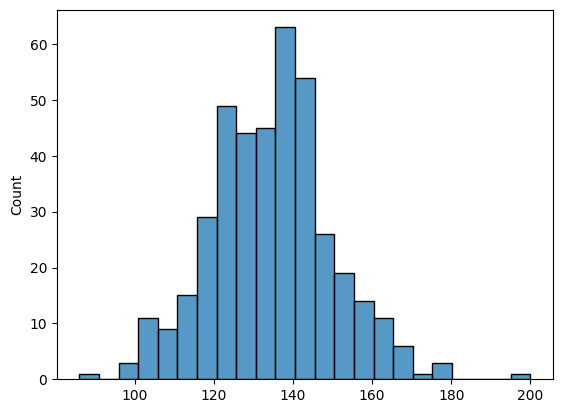

In [2]:
# Retrieve the baseline sistolic blood pressure
sbp = df["SBP_00"].values

# Plot the data
sns.histplot(sbp)
plt.show()

### Case 1 - Known $\sigma^2$

In this case, we assume $\sigma^2$ to be fixed (but still needs to be estimated) and we set a Normal prior for $\mu$. Thus, we are in the case of a Normal - Normal model:

\begin{align*}
    y_1, \dots, y_N \mid \mu &\stackrel{\tiny\mbox{iid}}{\sim} \mathcal{N}\left(\mu, \sigma^2\right) \\
    \mu &\sim \mathcal{N}\left(\mu_0, \sigma^2_0\right)
\end{align*}

**Question**: How can we estimate the variance $\sigma^2$ and the model parameters $\mu_0, \sigma_0^2$?

We can not use the data on which we need to make inference! *Why?*

Thus, what it is usually done is either to have long reunions with experts gives you the prior information you need to set up the prior, or, as in our case, we look  to similar data. For instance, we consider the NCHS report from 2011, in which we can find the follwing information:

- The average sistolic pressure is $(124 \pm 0.3)$ mmHg;
- The 0.25 and 0.75 empirical percentiles of sistolic pressure are, respectively, $113$ mmHg and $131$ mmHg.

With this information we can elicit our prior, i.e., we can set the model parameters. We do as follows:

1. From *"The average sistolic pressure is $(124 \pm 0.3)$ mmHg"* we have information about the population mean and its standard deviation. Thus, it is reasonable to set $\mu_0 = 124$. Does it make sense to set $\sigma_0 = 0.3$?
2. From *"The 0.25 and 0.75 empirical percentiles of sistolic pressure are, respectively, $113$ mmHg and $131$ mmHg"* we have information about the whole population. Hence, we can use it to estimate $\sigma$. In fact, under a Normal model, we know that $IQR = 1.34\sigma$. Thus, it is reasonable to set $\sigma = \frac{IQR}{1.34} = 13.43$.

**Elicited prior**: $\sigma = 13.43$, $\mu_0 = 124$ and $\sigma_0 = 25 \cdot 0.3 = 7.5$.

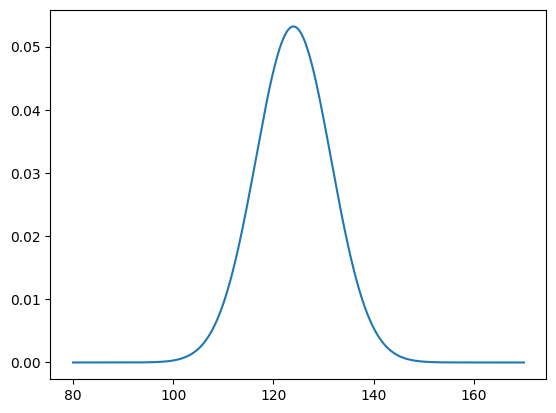

In [3]:
# Prior parameters
mu0 = 124
sig0 = 7.5

# Plot prior distribution
xx = np.linspace(80, 170, 1000)
plt.plot(xx, norm.pdf(xx, loc=mu0, scale=sig0))
plt.show()

**Question**: How can we check if the elicited prior is *good*? A possible solution is to perform some prior predictive checks. Thus, # We can compare the dataset with samples from the "prior predictive distribution", i.e. the marginal.

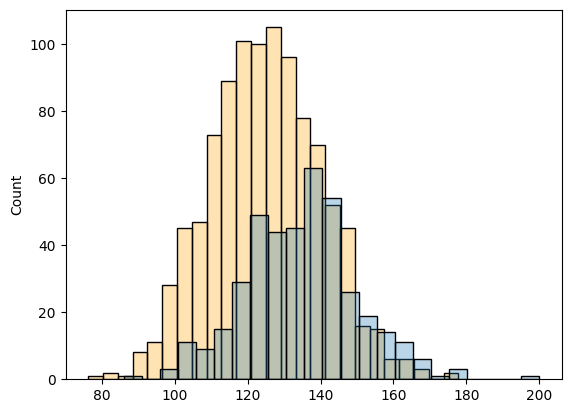

In [4]:
# Set number of samples from the marginal
nsamps = 1000

# Sample from the marginal
samps_from_marg = norm.rvs(
    loc=norm.rvs(loc=124, scale=7.5, size=nsamps), scale=13.43)

# Plot overlapped histograms
sns.histplot(samps_from_marg, alpha=0.3, color="orange")
sns.histplot(sbp, alpha=0.3)
plt.show()

We now compute the posterior distribution. Since the model is conjugate, we simply need to update the parameters.

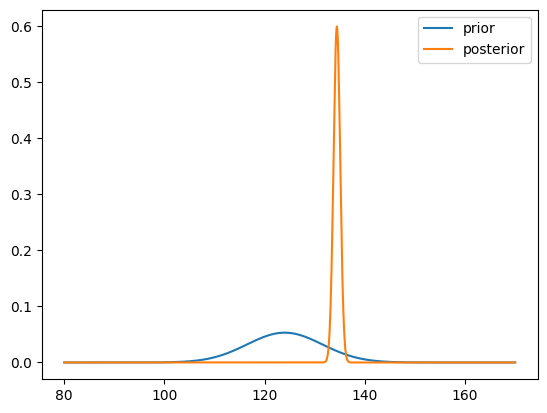

In [5]:
# Model precisions (1 / variance)
tau = 1.0 / 13.43**2
tau0 = 1.0 / sig0**2

# Compute posterior parameters
post_var = 1.0 / (tau * len(sbp) + tau0)
post_mean = (tau * np.sum(sbp) + tau0 * mu0) * post_var

# Posterior density
post1 = norm.pdf(xx, post_mean, np.sqrt(post_var))

# Plot
plt.plot(xx, norm.pdf(xx, mu0, 1.0 / np.sqrt(tau0)), label="prior")
plt.plot(xx, norm.pdf(xx, post_mean, np.sqrt(post_var)), label="posterior")
plt.legend()
plt.show()

What if we set up a prior without doing prior elicitation as follows? We may see a discrepancy between the prior and the posterior distribution. If this happen, we need to be aware that the posterior distribution may be biased by the strage prior we set.

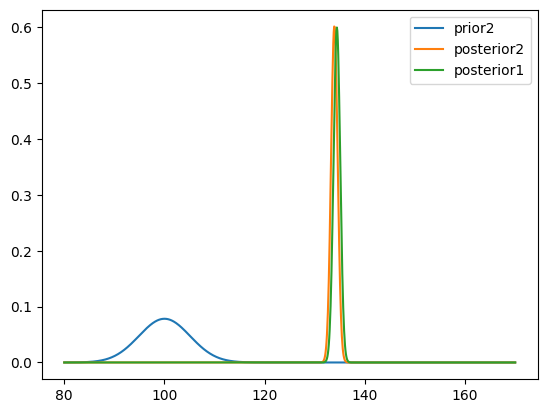

In [6]:
# Prior parameters
tau = 1.0 / 13.43**2
tau0 = 1.0 / 26.01
mu0 = 100

# Posterior parameters
post_var = 1.0 / (tau * len(sbp) + tau0)
post_mean = (tau * np.sum(sbp) + tau0 * mu0) * post_var

# Plot
plt.plot(xx, norm.pdf(xx, mu0, 1.0 / np.sqrt(tau0)), label="prior2")
plt.plot(xx, norm.pdf(xx, post_mean, np.sqrt(post_var)), label="posterior2")
plt.plot(xx, post1, label="posterior1")
plt.legend()
plt.show()

## Case 2 - Unknown $\sigma^2$

Now that also $\sigma^2$ is unknown, we use a Normal - Inverse Gamma model as joint prior for $(\mu, \sigma^2)$. We define $\tau = 1 / \sigma^2$ as the *precision*. Thus, the model can be written as:

\begin{align*}
    y_1, \dots, y_N \mid \mu, \tau &\stackrel{\tiny\mbox{iid}}{\sim} \mathcal{N}\left(\mu; \frac{1}{\tau}\right) \\[5pt]
    \mu \mid \tau &\sim \mathcal{N}\left(\mu_0, \frac{1}{\lambda\tau}\right) \\[5pt]
    \tau &\sim gamma\left(a, b\right)
\end{align*}

We keep the prior elicitation as before. A good guess for the population mean is $\mu_0 \approx 124$ and a good guess for the population variance is $1 / \tau \approx 13.43^2$.

We elicit our prior via plug-in estimate (also assuming something that is not true), i.e.

$$ \mathbb{E}\left[\frac{1}{\tau}\right] = 13.43^2 \quad\text{\textbf{but} saying:}\quad \frac{1}{\mathbb{E}\left[\tau\right]} = \frac{b}{a} = 13.43^2. $$

Hence, we have set, for now, $\mu_0 = 124$ and $b = 13.43^2 \cdot a$. What about $a$ and $\lambda$?

In [7]:
from scipy.special import gamma, loggamma
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

# Compute posterior marginal distribution for the mean
def mu_marg(mu, mu0, lam, a, b, log=False):
    out_log = loggamma(a + 0.5) - loggamma(a)
    out_log += a * np.log(b) - (a + 0.5) * np.log(b + 0.5 * lam * (mu - mu0)**2)
    out_log += np.log(np.sqrt(lam) / np.sqrt(2 * np.pi))
    if log:
        return out_log
    else:
        return np.exp(out_log)

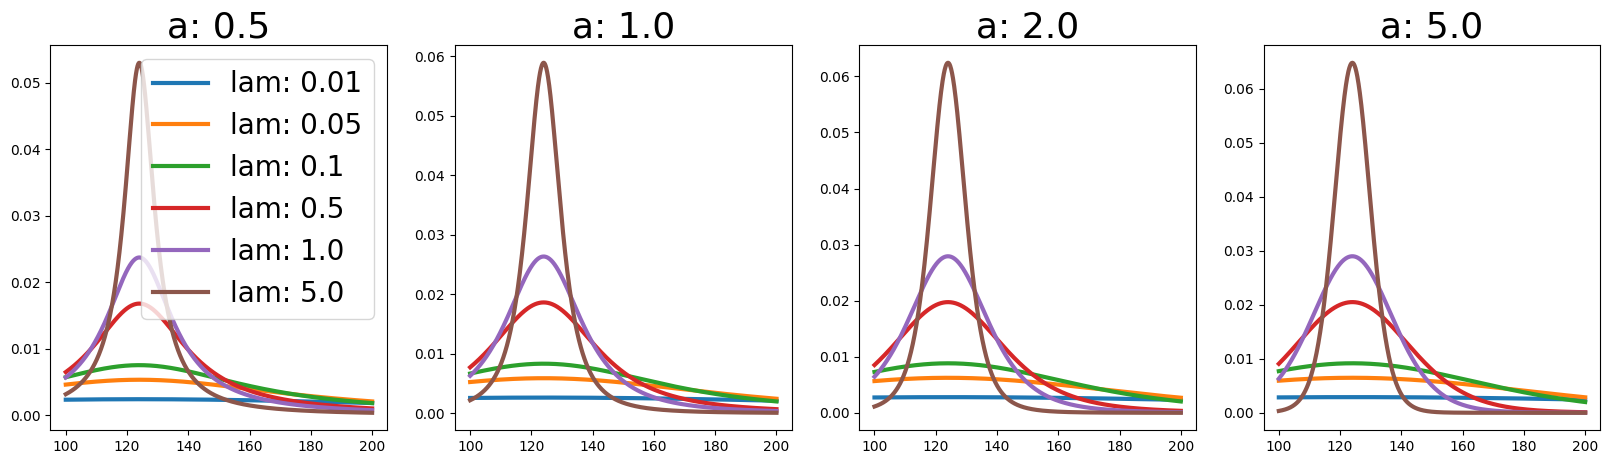

In [8]:
mu0 = 124

mugrid = np.linspace(100, 200, 1000)
a_vals = np.array([0.5, 1, 2.0, 5])
lam_vals = np.array([0.01, 0.05, 0.1, 0.5, 1.0, 5.0])

fig, axes = plt.subplots(nrows=1, ncols=len(a_vals), figsize=(20, 5))

for i, a in enumerate(a_vals):
    b = 13.43**2 * a
    for lam in lam_vals:
        axes[i].plot(mugrid, mu_marg(mugrid, mu0, lam, a, b), lw=3,label="lam: {0}".format(lam))
    axes[i].set_title("a: {0}".format(a), fontsize=26)

axes[0].legend(fontsize=20)
plt.show()

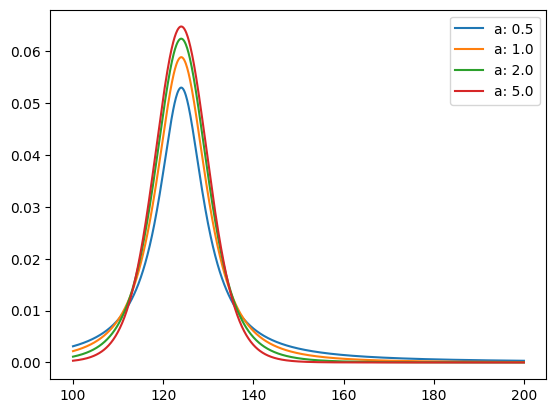

In [9]:
# Let's look better at the effect of a and b
lam = 5
for i, a in enumerate(a_vals):
    b = 13.43**2 * a
    plt.plot(mugrid, mu_marg(mugrid, mu0, lam, a, b), label="a: {0}".format(a))
plt.legend()
plt.show()

**Elicited Prior**: $\lambda = 5$, $a = 2$, $\mu_0 = 124$ and $b = a \cdot 13.43^2$

### Let's look at the posterior distribution

In [10]:
# Compute posterior parameters
def get_post_params(y, mu0, lam, a, b):
    ybar = np.mean(y)
    s = np.mean((y - ybar)**2)
    n = len(y)

    apost = a + n / 2.0
    bpost = b + 0.5 * (n * s + (lam * n * (ybar - mu0)**2) / (lam + n))
    lampost = lam + n
    mupost = (lam * mu0 + n * ybar) / (lam + n)
    return mupost, lampost, apost, bpost

In [11]:
# Prior parameters
mu0 = 124
lam = 5
a = 2
b = a * 13.43**2

# Posterior parameters
mupost, lampost, apost, bpost = get_post_params(sbp, mu0, lam, a, b)

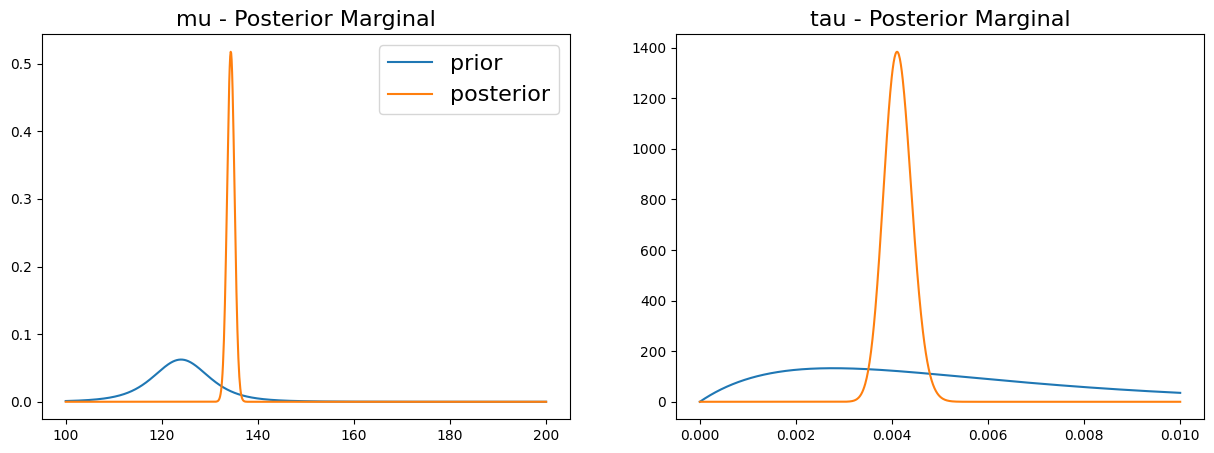

In [12]:
# Plot - comparison between prior and posterior distributions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(mugrid, mu_marg(mugrid, mu0, lam, a, b), label="prior")
axes[0].plot(mugrid, mu_marg(mugrid, mupost, lampost, apost, bpost), label="posterior")
axes[0].set_title("mu - Posterior Marginal", fontsize=16)
axes[0].legend(fontsize=16)

taugrid = np.linspace(0, 0.01, 1000)

axes[1].plot(taugrid, tfd.Gamma(a, b).prob(taugrid), label="prior")
axes[1].plot(taugrid, tfd.Gamma(apost, bpost).prob(taugrid), label="posterior")
axes[1].set_title("tau - Posterior Marginal", fontsize=16)

plt.show()

The expected value of $\tau$ a posteriori is:

In [13]:
print(apost / bpost)

0.004125955785657611


<!--
### We can estimate the posterior expected value of the standard deviation via Monte Carlo!

$$
\mathbb E[\sigma \mid \mathbf{y}] = \mathbb E[(\sqrt \tau)^{-1} \mid \mathbf{y}] = \int_0^\infty \tau^{-1/2} \pi(\tau \mid \mathbf{y}) \mathrm d(\tau) \approx \frac{1}{M} \sum_{i=1}^M \tau_{(i)}^{-1/2}
$$

where $\tau_{(1)}, \tau_{(2)}, \ldots$ are i.i.d from $\pi(\tau | \mathbf{y})$

tau_samps = tfd.Gamma(apost, bpost).sample()
print(np.mean(tau_samps ** (-1/2)))

-->